<a href="https://colab.research.google.com/github/eminekocabay/IZV701-Avokado/blob/main/ETicaretUr%C3%BCnYorumlari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving e-ticaret_urun_yorumlari.csv to e-ticaret_urun_yorumlari.csv


In [3]:
import pandas as pd

# Dosyayı uygun ayırıcı ile tekrar okuyalım
df = pd.read_csv("e-ticaret_urun_yorumlari.csv", sep=";")

# İlk 5 satıra
df.head()


,Metin,Durum
0,evet anlatıldığı gibi,1
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1
3,Daha öncede aynısını almıştım çok güzel ve kal...,1
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1


In [4]:
#Sütun Adları
df.columns

Index(['Metin', 'Durum'], dtype='object')

In [5]:
#Durum kolonunun dağılımı
#0: olumsuz, 1: olumlu, 2: nötr
df['Durum'].value_counts()

,count
Durum,
0,6978
1,6799
2,1393


In [6]:
#Eksik veri kontrolü
df.isnull().sum()

,0
Metin,0
Durum,0


In [7]:
#Ortalama yorum uzunluğu
df['Metin'].apply(lambda x: len(str(x).split())).mean()

np.float64(11.989123269611074)

In [8]:
#Bu, regex (regular expressions) modülünü aktarmak içinmiş
import re

# Küçük harfe çevirme ve noktalama işaretlerini kaldırmak için def ile temizle fonksiyonu tanımlandı
# Adı temilze girdisi metin sütunu
def temizle(metin):
    # Küçük harf yap
    metin = metin.lower()
    # Noktalama işaretlerini ve rakamları kaldır
    #re.sub() : "şu desen varsa, şununla değiştir."
    metin = re.sub(r'[^\w\s]', '', metin)  # Noktalama işaretleri
    metin = re.sub(r'\d+', '', metin)      # Sayılar
    return metin

# Orjinalini korumak için işlem gören verileri yeni bir sütun olarak ekle
df['temiz_metin'] = df['Metin'].apply(temizle)

# Temizlenmiş ilk 5 yoruma bakalım
df[['Metin', 'temiz_metin']].head()


,Metin,temiz_metin
0,evet anlatıldığı gibi,evet anlatıldığı gibi
1,Daha öncede almıştım bu cihazdan ense ve sakal...,daha öncede almıştım bu cihazdan ense ve sakal...
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,ürün gayet başarılı sakal kesmede başlık sayıs...
3,Daha öncede aynısını almıştım çok güzel ve kal...,daha öncede aynısını almıştım çok güzel ve kal...
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,erkek kuaförüyüm ense ve sıfır sakal traşı içi...


In [9]:
#Bu kod nltk (Natural Language Toolkit) adlı dil işleme kütüphanesini yükler ve içindeki stopword listesini indirir
!pip install nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords

# Türkçe stopword listesi (bu, gibi, için, ama)
stop_words = set(stopwords.words('turkish'))

# Stopword temizleme fonksiyonu
def stopword_temizle(metin):
    kelimeler = metin.split() #split kelimelere ayırmak için kullanılır
    temiz_kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
    return ' '.join(temiz_kelimeler)

# Temizlenmiş metinlere uygulayalım
df['temiz_metin2'] = df['temiz_metin'].apply(stopword_temizle)

# İlk 5 satıra tekrar bakalım
df[['Metin', 'temiz_metin', 'temiz_metin2']].head()


,Metin,temiz_metin,temiz_metin2
0,evet anlatıldığı gibi,evet anlatıldığı gibi,evet anlatıldığı
1,Daha öncede almıştım bu cihazdan ense ve sakal...,daha öncede almıştım bu cihazdan ense ve sakal...,öncede almıştım cihazdan ense sakal tüketmek o...
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,ürün gayet başarılı sakal kesmede başlık sayıs...,ürün gayet başarılı sakal kesmede başlık sayıs...
3,Daha öncede aynısını almıştım çok güzel ve kal...,daha öncede aynısını almıştım çok güzel ve kal...,öncede aynısını almıştım güzel kaliteli bir ürün
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,erkek kuaförüyüm ense ve sıfır sakal traşı içi...,erkek kuaförüyüm ense sıfır sakal traşı uygun ...


In [13]:
#TF-IDF Dönüştürücü Kullanımı
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
#TF-IDF işlemi:
# TF-IDF nesnesi oluştur
vectorizer = TfidfVectorizer(max_features=5000)  # En çok geçen 5000 kelimeyi al

# Temizlenmiş yorumlara uygula
X = vectorizer.fit_transform(df['temiz_metin2'])

# Şekline bakalım (kaç yorum x kaç kelime)
X.shape

(15170, 5000)

In [17]:
#Veriyi Eğitim ve Test Olarak Bölmek için gerekli kütüphane
from sklearn.model_selection import train_test_split

In [18]:
# Hedef değişken (etiket) = Durum yani Tahmin etmeye çalışacağımız şey: yorumun olumlu, olumsuz ya da nötr olması
y = df['Durum']

# Veriyi böl (X = sayısallaştırılmış TF-IDF matrisi)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#Toplamları 15170 yapar
print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

Eğitim verisi boyutu: (12136, 5000)
Test verisi boyutu: (3034, 5000)


In [20]:
#Lojistik Regresyon Modeli için gerekli kütüphane
from sklearn.linear_model import LogisticRegression

In [21]:
# Model nesnesi oluştur
model = LogisticRegression(max_iter=1000)  # Eğitim için maksimum iterasyon/öğrenme sayısı

# Eğitimi başlat
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [22]:
#Tahmin yapmak için ve Başarıyı ölçmek için
#accuracy_score - Kaçta kaç doğru
#classification_report - Her sınıf için detaylı değerlendirme
#confusion_matrix - Hangi sınıf hangisiyle karıştı?
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
#Test verisinde tahminleme yapılır
#Sonuçlar y_pred e tanımlanır
y_pred = model.predict(X_test)

In [24]:
#Doğruluk Oranı
#accuracy_score - Kaçta kaç doğru
print("Doğruluk Oranı: ", accuracy_score(y_test, y_pred))

Doğruluk Oranı:  0.8839815425181279


In [25]:
#classification_report - Her sınıf için detaylı değerlendirme
print("Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred))


Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1370
           1       0.90      0.93      0.91      1384
           2       0.68      0.33      0.45       280

    accuracy                           0.88      3034
   macro avg       0.82      0.74      0.76      3034
weighted avg       0.87      0.88      0.87      3034



In [26]:
#confusion_matrix - Hangi sınıf hangisiyle karıştı?
print("Karışıklık Matrisi:\n")
print(confusion_matrix(y_test, y_pred))

Karışıklık Matrisi:

[[1298   39   33]
 [  82 1291   11]
 [  78  109   93]]


In [27]:
#Garifk Çizdirme için kullanılacak kütüphaneler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

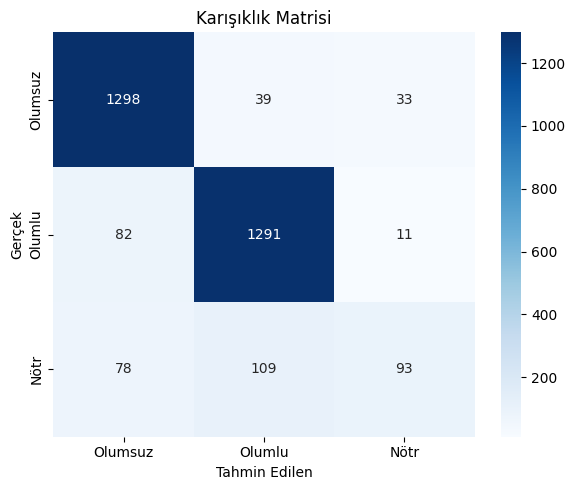

In [28]:
#1.GRAFİK Karışıklık Matrisi (Confusion Matrix) Heatmap
#labels: Grafik eksenlerinde görünecek sınıf adları.
#confusion_matrix(y_test, y_pred): Gerçek etiketler ile modelin tahmin ettiği etiketleri karşılaştırır.
labels = ['Olumsuz', 'Olumlu', 'Nötr']
cm = confusion_matrix(y_test, y_pred)

#Görselleştirme Adımı
#annot=True: Her kutunun içine sayıları yaz
#fmt='d': Sayılar tam sayı olarak göster
#cmap='Blues': Renk skalası mavi tonlarında
#xticklabels, yticklabels: Grafik eksen isimleri yukarıda tanımladığımız label yanı sınıf adları olur
plt.figure(figsize=(6, 5))  # Grafik boyutu
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
#Etiketler
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.tight_layout()
plt.show()

